In [192]:
import numpy as np
import pandas as pd
import plotly.express as px
import regex as re

(FIX ME: MAKE IT WORD GOOD)


First things first, we acknowledge that our data is number encoded. While this is optimal for surveying, we would like to see what all the numbers mean. We will begin by making a dictionary that will contain the name of a categorical feature and the corresponding numbers of the possible options of that feature:

In [193]:
features_dict = {"Marital status": "1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated",
                 
                 "Application mode": "1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)",
                 
                 "Course": "33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)",
                 
                 "Daytime/evening attendance": "1 – daytime 0 - evening",
                 
                 "Previous qualification": "1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)",
                 
                 "Nacionality": "1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian",
                 
                 "Mother's qualification": "1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)",
                 
                 "Father's qualification": "1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)",
                 
                 "Mother's occupation": "0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants",
                 
                 "Father's occupation": "0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers",
                 
                 "Displaced": "1 – yes 0 – no",
                 
                 "Educational special needs": "1 – yes 0 – no",
                 
                 "Debtor": "1 – yes 0 – no",
                 
                 "Tuition fees up to date": "1 – yes 0 – no",
                 
                 "Gender": "1 – male 0 – female",
                 
                 "Scholarship holder": "1 – yes 0 – no",
                 
                 "International": "1 – yes 0 – no"
                 
}


Now, we will read in the data and print its head:

In [194]:
raw_data = pd.read_csv('data.csv', sep = ';')
df_raw = raw_data.copy()
pd.set_option('display.max_columns', None) # Ensures we can see all columns
df_raw.info() # Shows data types
df_raw.head() # Shows first five rows to get a sense of whats going on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Something we noticed is that the "Daytime/evening attendance" column is formatted quite weirdly with the "\t" at the end. Let's fix that and also start grouping up all of the categorical columns:

In [195]:
# Renaming Daytime/evening attendance column
df_raw_2 = df_raw.rename({'Daytime/evening attendance\t': 'Daytime/evening attendance'}, axis=1)

# Group up all the categorical variable columns
cat_cols = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20] # Index numbers
cat_col_names = [df_raw_2.columns[i] for i in cat_cols] # Gathering the names

# Ensure that the names we gathered are of type string
for col in cat_col_names:
    df_raw_2[col] = df_raw_2[col].astype(str)

Now, let's use regular expressions alongside our features dictionary to begin the process of making these numbers mean something:

In [196]:
### FIX ME: Thomas add comments to explain what this code does, b/c me (Andres) don't understand.

replace_dicts = dict()
for col in cat_col_names:
    text = features_dict[col]
    labels = re.split(";? ?([0-9]+) [-–] ", text)[1:]
    names_dict = {labels[2*k]: labels[2*k+1] for k in range(len(labels) // 2)}
    replace_dicts[col] = names_dict

df_raw_3 = df_raw_2.copy()

for col in cat_col_names:
    df_raw_3[col] = df_raw_3[col].replace(replace_dicts[col])

Let's see, what the new data frame looks like after those changes:

In [197]:
df_raw_3.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


For convenience, we will rename the "Nacionality" into "Nationality" to correct the spelling:

In [198]:
df_renamed = df_raw_3.rename({"Nacionality": "Nationality"}, axis=1)

# Printing our renamed dataframe
df_renamed.info() # Ensuring now that the columns are not int64 type
df_renamed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


One problem with this dataset is that it contains many qualitative features, each of which consists of many levels. Additionally, some of these levels represent such a small proportion of observations that they introduce difficulty and needless bulk to the data exploration process.

As an example, we examine the "Application mode" variable.

In [199]:
# How many levels does the "Application mode" variable have?
print("Number of levels: {} \n".format(len(df_renamed["Application mode"].unique())))

# How many observations correspond to each level of the application mode variable?
print(df_renamed.groupby("Application mode").count()["Target"])

Number of levels: 18 

Application mode
1st phase - general contingent                         1708
1st phase - special contingent (Azores Island)           16
1st phase - special contingent (Madeira Island)          38
2nd phase - general contingent                          872
3rd phase - general contingent                          124
Change of course                                        312
Change of institution/course                             59
Change of institution/course (International)              1
Holders of other higher courses                         139
International student (bachelor)                         30
Ordinance No. 533-A/99, item b2) (Different Plan)         1
Ordinance No. 533-A/99, item b3 (Other Institution)       1
Ordinance No. 612/93                                      3
Ordinance No. 854-B/99                                   10
Over 23 years old                                       785
Short cycle diploma holders                              35


As we can see, the "Application mode" variable alone has 18 levels. If all of the qualitative variables are one-hot encoded for modeling, they will add hundreds of feature columns to the dataframe and introduce unneeded bulkiness to the dataset.

Additionally, many of the one-hot encoded features would be sparse. We can see that many of the categories correspond to less than 80 observations, about ~2% of the dataset. These sparse features might interfere with the modeling process, especially if they are not present in the training/test set. To deal with this issue, we will relabel these small categories  as "Other". This will reduce the complexity of the dataset and ensure that the qualitative variables have a workable distribution.

In [200]:
# Getting a list of the names of each categorical feature
cat_cols = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20]
cat_col_names = [df_renamed.columns[i] for i in cat_cols]

reduced_categories = dict()

# Locate the categories that represent fewer than 80 features and relabel them as "Other"
for col in cat_col_names:
    group_count = df_renamed.groupby(col).count().iloc[:,0]
    small_groups = [group for group in group_count.index if group_count.loc[group] < 80]
    reduced_categories[col] = small_groups
    in_small_groups = np.where(df_renamed[col].isin(small_groups))
    df_renamed.loc[in_small_groups[0], col] = "Other"

Now the distributions of each qualitative variable will be more manageable.

In [201]:
# How many levels does the "Application mode" variable have?
print("Number of levels: {} \n".format(len(df_renamed["Father's occupation"].unique())))

# How many observations correspond to each level of the application mode variable?
print(df_renamed.groupby("Father's occupation").count()["Target"])

Number of levels: 12 

Father's occupation
Administrative staff                                                                                           386
Armed Forces Professions                                                                                       266
Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                                             242
Installation and Machine Operators and Assembly Workers                                                        318
Intermediate Level Technicians and Professions                                                                 384
Other                                                                                                          177
Personal Services, Security and Safety Workers and Sellers                                                     516
Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers     134
Skilled Workers in Industry, Construc

We can see which categories were reduced to "Other."

In [202]:
for col in cat_col_names:
    print("\n"+col+"\n")
    print(reduced_categories[col])


Marital status

['facto union', 'legally separated', 'widower']

Application mode

['1st phase - special contingent (Azores Island)', '1st phase - special contingent (Madeira Island)', 'Change of institution/course', 'Change of institution/course (International)', 'International student (bachelor)', 'Ordinance No. 533-A/99, item b2) (Different Plan)', 'Ordinance No. 533-A/99, item b3 (Other Institution)', 'Ordinance No. 612/93', 'Ordinance No. 854-B/99', 'Short cycle diploma holders', 'Transfer']

Course

['Biofuel Production Technologies']

Daytime/evening attendance

[]

Previous qualification

['10th year of schooling', '10th year of schooling - not completed', '11th year of schooling - not completed', '12th year of schooling - not completed', 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 'Frequency of higher education', "Higher education - bachelor's degree", 'Higher education - degree (1st cycle)', 'Higher education - doctorate', 'Higher education - master (2nd cycle)

We can also view which classes were retained for each feature:

In [203]:
for col in cat_col_names:
    print("\n"+col+"\n")
    print(df_renamed[col].unique())


Marital status

['single' 'married' 'divorced' 'Other']

Application mode

['2nd phase - general contingent' 'Other' '1st phase - general contingent'
 'Over 23 years old' '3rd phase - general contingent'
 'Technological specialization diploma holders' 'Change of course'
 'Holders of other higher courses']

Course

['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (evening attendance)'
 'Management (evening attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Basic Education'
 'Veterinary Nursing' 'Equinculture' 'Oral Hygiene' 'Management'
 'Agronomy' 'Other' 'Informatics Engineering']

Daytime/evening attendance

['daytime' 'evening']

Previous qualification

['Secondary education'
 'Basic education 3rd cycle (9th/10th/11th year) or equiv.' 'Other'
 'Technological specialization course' 'Higher education - degree']

Nationality

['Portuguese' 'Other']

Mother's qualification

['Basic Educatio

---

## Andres doing Feature Selection

To begin the feature selection portion of this project, let us remind ourselves of what our data looks like (this markdown and code output will probably be deleted in the final product):

In [204]:
df_renamed.info()
df_renamed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,Other,1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


If we look at the data types for all of our features they fall into one of two batches: numerical (int64 or float64) and categorical (object). We have 19 total numerical features and 17 total categorical features (excluding the target) giving us a grand total of 36 independent variables to consider. We will aim to treat each feature different depending on their data type and try to reduce the amount of features for more generalization. Ideally, all the features are predictive towards the target but majority of the time that is not the case. Additionally, we must be wary of the curse of dimensionality looming over our head. Here's how we will accomplish this:
- We will first create 2 data frames: 1 with just the categorical features and another with only the numerical features.

- Then, we will carry out appropriate tests for the data types to check for the strength of correlation between the variables. Strongly correlated variable combinations will give us leeway to cut some features from the final model. 
    - Cramer's V Matrix for categorical features
    - Pearson's Correlation Coefficients ($r$) and Analysis of Variance (ANOVA) for the numerical features

- After we identify the feature(s) that aren't very predictive we will make determinations based on our research goals and intuition whether or not we remove the feature.

### Creating categorical and numerical feature data frames

Let's begin by creating the categorical features data frame:

In [205]:
cat_df = df_renamed.select_dtypes(include=['object']) # Select only the object types (categorical types)
print("Before drop",cat_df.shape) # Verify we get the 18 categorical columns
cat_df = cat_df.drop(columns='Target') # Dropping the target column
print("After drop",cat_df.shape) # Verify we have 17 categorical columns now
cat_df.head() # Verify correct selection

Before drop (4424, 18)
After drop (4424, 17)


,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,single,2nd phase - general contingent,Animation and Multimedia Design,daytime,Secondary education,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other,"Personal Services, Security and Safety Workers...",Unskilled Workers,yes,no,no,yes,male,no,no
1,single,Other,Tourism,daytime,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,yes,no,no,no,male,no,no
2,single,1st phase - general contingent,Communication Design,daytime,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,yes,no,no,no,male,no,no
3,single,2nd phase - general contingent,Journalism and Communication,daytime,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,yes,no,no,yes,female,no,no
4,married,Over 23 years old,Social Service (evening attendance),evening,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,no,no,no,yes,female,no,no


Now, the numerical features data frame:

In [206]:
num_df = df_renamed.select_dtypes(include=['number']) # Select only the numerical types
print(num_df.shape) # Ensure we have 19 columns for the 19 numerical features
num_df.head()

(4424, 19)


,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,5,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,5,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,2,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,1,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


### Categorical feature selection

Resources (remove these and paster into final report):
- Formulation: Cramér, Harald. 1946. Mathematical Methods of Statistics. Princeton: Princeton University Press, page 282 (Chapter 21. The two-dimensional case). 
- Wiki link to the formula: https://en.wikipedia.org/wiki/Cram%C3%A9r's_V
- https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6

As stated previously, we will be using Cramér's V to create a correlation matrix to conduct our categorical feature selection.

Cramér's V is a measure used to understand the strength of the relationship between two categorical variables with two or more unique values per variable in a contingency table. It provides a relative measure of association that is not influenced by the size of the table or the dataset. This statistic was published by Harald Cramér in 1946 in the book titled *Mathematical Methods of Statistics*. Here is his formulation that we will implement (bias corrected):

$\tilde{V} = \sqrt{\frac{\tilde{\phi}^2}{\text{min}(\tilde{k}-1, \tilde{r}-1)}}$ 

where $\phi^2 = \frac{\chi^2}{n}$, $k \text{ is number of columns and } r \text{ is number of rows}$, and

where $\tilde{\phi}^2 = \text{max}(0, \phi^2 - \frac{(k-1)(r-1)}{n-1})$, $\tilde{k} = k - \frac{(k-1)^2}{n-1}$, and $\tilde{r} = r - \frac{(r-1)^2}{n-1}$

The value of Cramér's V statistic ranges from [0,1]. A value of $V$ that is close to 0 indicates that two variables we are comparing have little to no association and values of $V$ that are close to 1 indicates that the two variables are very associated with each other. Generally, a $V$ greater than 0.9 is considered as alarming as correlation goes but we will keep note of any above 0.5.

Before we use Cramér's V, we need to encode our data. We will use `LabelEncoder()` for this. Let's implement it and print the head of the new `cat_df`:

In [207]:
# Importing the LabelEncoder() function
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder() # Initializing the label encoder
cat_df_encoded = pd.DataFrame() # Initialize empty dataframe for encoded data

# Iterate through all the columns to encode them
for i in cat_df.columns:
    cat_df_encoded[i] = label.fit_transform(cat_df[i])

cat_df_encoded.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,3,1,2,0,3,1,1,4,4,11,1,1,0,1,1,0,0
1,3,5,15,0,3,1,6,3,2,4,1,1,0,0,1,0,0
2,3,0,4,0,3,1,2,2,9,11,1,1,0,0,1,0,0
3,3,1,7,0,3,1,0,2,4,4,1,1,0,1,0,0,0
4,2,6,14,1,3,1,2,0,9,11,0,1,0,1,0,0,0


Now, we can implement a function called `cramers_V()` that will calculate the $V$ statistic between two variables:

In [208]:

# Importing a function to calculate the chi^2 statistic
from scipy.stats import chi2_contingency

def cramers_V(var_1, var_2):
    """
    Summary:
    Implements the Cramer's V function according to the formula created
    by Harald Cramer (1946) and provide by Wikipedia in the following link:
    https://en.wikipedia.org/wiki/Cram%C3%A9r's_V.
    
    Args:
        var_1 (DataFrame Column): First feature used for comparison
        var_2 (DataFrame Column): Second feature used for comparison

    Returns:
        V (float64): Cramer's V Statistic
    """
    # Create contingency table
    contingency_table = pd.crosstab(var_1, var_2, rownames = None, colnames = None)
    # Calculate chi^2 statistic
    chi2 = chi2_contingency(contingency_table)[0] # Default is alpha = 0.05
    
    # Calculate the number of observations
    n = contingency_table.sum().sum()
    # Getting the shape of the contingency table i.e. r and k
    r, k = contingency_table.shape
    
    # Calculating the phi coefficients
    phi2 = chi2 / n
    phi2_tilde = max(0, phi2 - (((k - 1)*(r - 1))/ (n - 1)))
    # Calculating r_tilde and k_tilde
    r_tilde = r - (((r - 1) ** 2) / ( n - 1 ))
    k_tilde = k - (((k - 1) ** 2) / ( n - 1 ))
    # Calculate V
    V = np.sqrt(phi2_tilde / min((k_tilde - 1), (r_tilde - 1)))
    return V
    

Let's use this function above to create a symmetrical data frame called `cramers_results` which we will later use to create a heat map and visualize the correlation between categorical columns:

In [209]:
cramers_rows = [] # Creating empty list to store the row V cramer's values

for var_1 in cat_df_encoded:
    cramers_cols = [] # Creating empty list to store the column V cramer's values
    for var_2 in cat_df_encoded:
        v = cramers_V(cat_df_encoded[var_1], cat_df_encoded[var_2]) # Calculating V
        cramers_cols.append(round(v, 2)) # Round to 2 decimal places
    cramers_rows.append(cramers_cols) # Append the column values to the row list since the matrix is symmetric

cramers_vs = np.array(cramers_rows)

# Putting the results into a dataframe
cramers_results = pd.DataFrame(cramers_vs, columns=cat_df_encoded.columns, index=cat_df_encoded.columns)
cramers_results

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
Marital status,1.00,0.29,0.21,0.36,0.18,0.02,0.19,0.15,0.10,0.07,0.27,0.02,0.03,0.09,0.05,0.11,0.02
Application mode,0.29,1.00,0.24,0.41,0.64,0.19,0.13,0.12,0.10,0.08,0.40,0.02,0.14,0.19,0.17,0.21,0.19
Course,0.21,0.24,1.00,1.00,0.21,0.09,0.14,0.13,0.11,0.10,0.32,0.06,0.15,0.14,0.42,0.22,0.09
Daytime/evening attendance,0.36,0.41,1.00,1.00,0.17,0.02,0.27,0.24,0.17,0.12,0.25,0.02,0.00,0.03,0.00,0.09,0.02
Previous qualification,0.18,0.64,0.21,0.17,1.00,0.04,0.10,0.09,0.08,0.08,0.21,0.01,0.14,0.14,0.11,0.13,0.04
Nationality,0.02,0.19,0.09,0.02,0.04,1.00,0.06,0.09,0.06,0.04,0.00,0.00,0.07,0.04,0.02,0.02,1.00
Mother's qualification,0.19,0.13,0.14,0.27,0.10,0.06,1.00,0.46,0.41,0.29,0.14,0.00,0.01,0.06,0.08,0.19,0.06
Father's qualification,0.15,0.12,0.13,0.24,0.09,0.09,0.46,1.00,0.33,0.41,0.10,0.00,0.03,0.07,0.09,0.18,0.09
Mother's occupation,0.10,0.10,0.11,0.17,0.08,0.06,0.41,0.33,1.00,0.46,0.07,0.02,0.09,0.05,0.06,0.19,0.06
Father's occupation,0.07,0.08,0.10,0.12,0.08,0.04,0.29,0.41,0.46,1.00,0.10,0.00,0.09,0.05,0.08,0.23,0.04


We have created the matrix, now let's visualize it with a heat map:

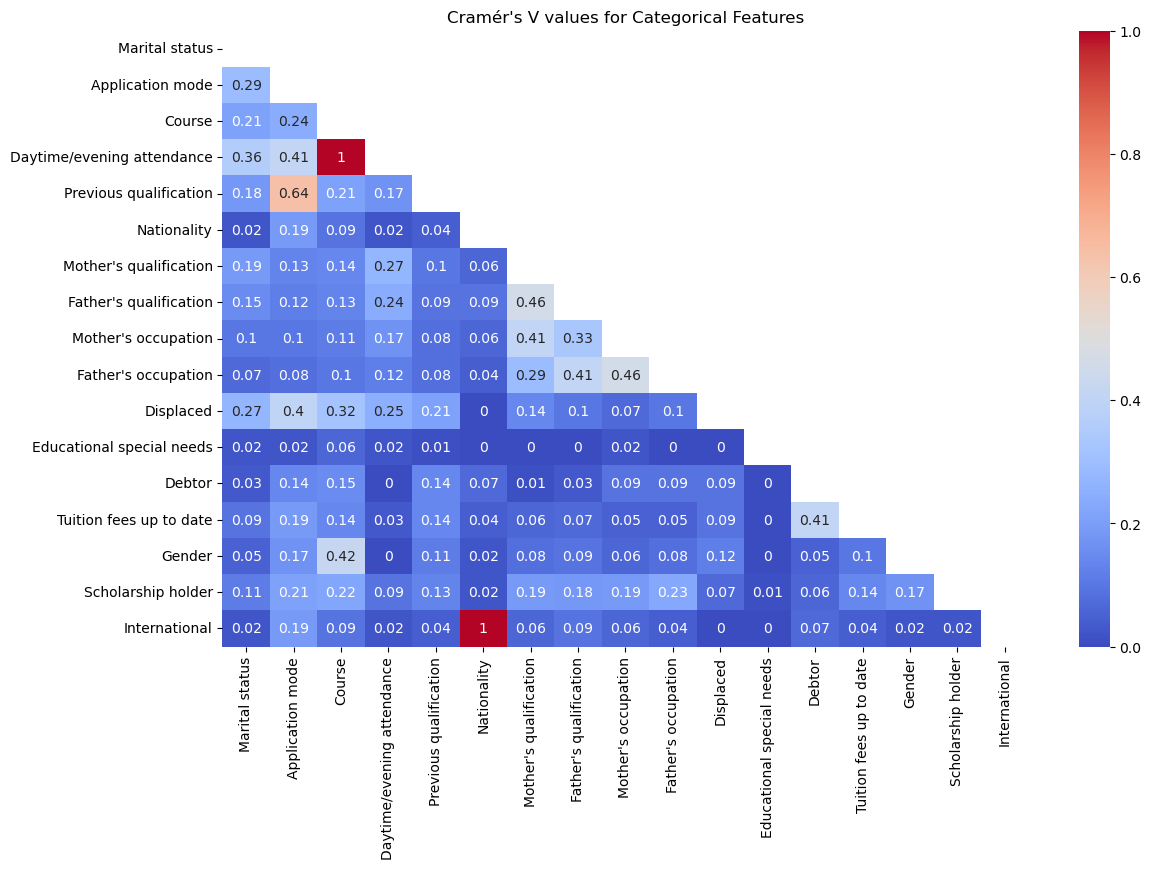

In [210]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a mask to hide the upper triangle part of symmetrical matrix
mask = np.zeros_like(cramers_results, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize = (13, 8))
plt.title("Cramér's V values for Categorical Features")
sns.heatmap(cramers_results, mask = mask, annot = True, cmap = "coolwarm")
plt.show()

The following bullets describes the results of this heatmap:
- There were 3 Cramér's V values above 0.5. These V's were between the following feature combinations:
    - Previous Qualification and Application Mode (V = 0.6)
    - Daytime/Evening Attendance and Course (V = 1)
    - Nationality and International (V = 1)
- For the 3 feature combinations above, one of them will be discarded while the other will be used in modeling.

We will discuss what will be done with these categorical features at the end of this section. For now, let's move onto the numerical features.

### Numerical Feature Selection

We will start by creating a correlation matrix showcased as a heatmap using Pearson's Correlation Coefficient ($r$). If the absolute value of any $r$ value is greater than 0.8, that feature pair would be considered very correlated with each other. Let's implement the heat map into our program:

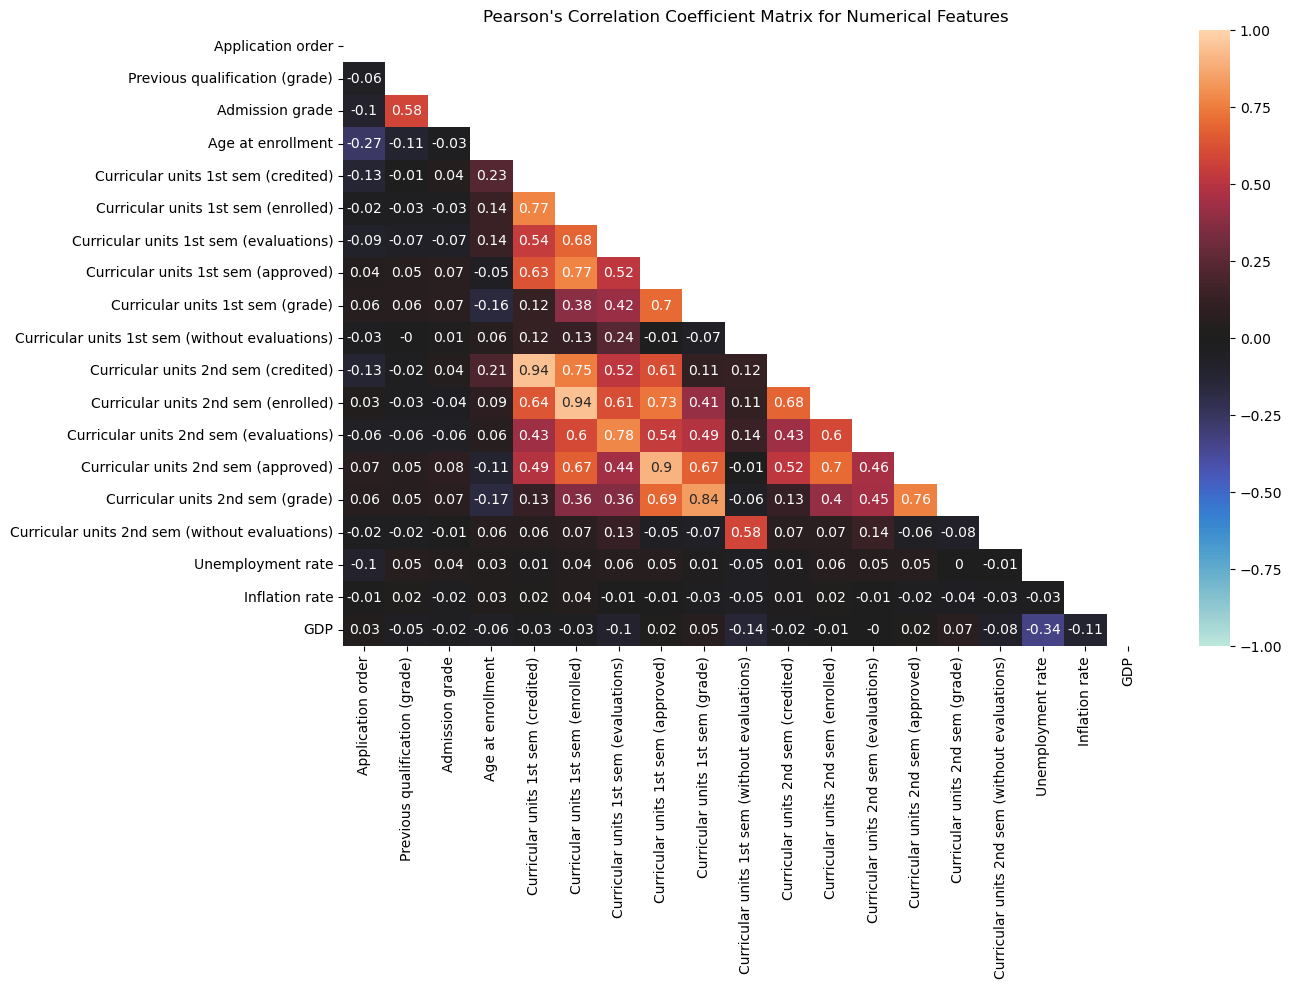

In [211]:
# Calculating the pair-wise pearson correlation coefficient
corr_matrix = num_df.corr()
corr_matrix = corr_matrix.round(2)

# Creating a mask to hide the upper triangle part of symmetrical matrix
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize = (13, 8))
plt.title("Pearson's Correlation Coefficient Matrix for Numerical Features")
sns.heatmap(corr_matrix, mask = mask, annot = True, vmin=-1, vmax=1, center=0)
plt.show()

The following bullet points describe the results of the heatmap:
- There are four $r$ values above 0.8. These $r$ values were between the following feature combinations:
    - Curricular units 1st sem (enrolled) and its 2nd semester counterpart ($r$ = 0.94)
    - Curricular units 1st sem (credited) and its 2nd semester counterpart ($r$ = 0.94)
    - Curricular units 1st sem (approved) and its 2nd semester counterpart ($r$ = 0.9)
    - Curricular units 1st sem (grade) and its 2nd semester counterpart ($r$ = 0.84)

- While the majority of the features are not very correlated with each other, there were a couple instances of feature combinations getting close to 0.8. But again, these feature combinations were correlated because the values were taken a semester apart.

- Additionally, the 1st and 2nd semester features often correlate highly with each other such as credits, approval, grade, etc. It might be worth looking into getting rid of redundant semester features.

- We will have to make a decision to determine if its best to keep the 1st semester features or the 2nd semester features as they are very correlated with each other. Which semester (1st or 2nd) we pick may not matter as much because the $r$ values are telling us they tell the same story linearly.

However, although correlation between numerical variables is important, we are more interested in the effect they have on the target value. That's where a function from `sklearn` comes in called `SelectKBest()`. It uses a scoring function ($F$ statistic from ANOVA, $\chi^2$, etc) to select features according to the k highest scores. We will use it along with the $r$ values we gathered previously to help us narrow down which numerical features to select.

Resource about `SelectKBest()`: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

The scoring function that is ideal in our scenario is the default `f_classif`, which is the $F$ statistic from the ANOVA procedure. ANOVA is useful for comparing numerical features according to some category. Our category in this case is our target variable. Remember we have three possible outcomes for target variable: Graduated (Success), Enrolled (Relative Success), and Dropout (Failure).

A reminder of the F statistic from the ANOVA table:

$F = \frac{MST}{MSE}$ where $MST$ is Mean Square for Treatment and $MSE$ is Mean Square for Error.

Intuitively the $F$-statistic can be thought of as $F = \frac{\text{variation between sample means}}{\text{variation within the samples}}$. It is used frequently in the ANOVA F-Test where your goal is to compare $k$ number of treatment means. The null hypothesis of that test is that the $k$ treatment means are the same and if we reject said test we have evidence to say that they aren't. The higher the $F$, the more likely it is that we reject and the more variation there is between sample means. We want lots of variation between sample means as this is what we want out of a predictive feature.

To use `SelectKBest()` we need to use a $Y$ response (target) vector:

In [212]:
Y = label.fit_transform(df_renamed["Target"].values) # Making sure the target is encoded
Y

array([0, 2, 0, ..., 0, 2, 2])

Now, we can implement `SelectKBest()`:

In [213]:
from sklearn.feature_selection import SelectKBest

# Fit SelectKBest
# Use k = "all" will result in keeping all features 
# to examine all of the scores (F-stats) and p-values
result = SelectKBest(k="all").fit(num_df, Y)

# Extract scores and p-values
scores = result.scores_
p_values = result.pvalues_

# Get feature names
feature_names = num_df.columns

# Sort by F-stat scores (descending)
sorted_indices = np.argsort(scores)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_scores = scores[sorted_indices]
sorted_pvals = p_values[sorted_indices]

# Print results
for feature, score, p_val in zip(sorted_features, sorted_scores, sorted_pvals):
    print(f"Feature: {feature}, F-stat: {score:.4f}, p-value: {p_val:.4f}")

Feature: Curricular units 2nd sem (approved), F-stat: 1410.7329, p-value: 0.0000
Feature: Curricular units 2nd sem (grade), F-stat: 1134.1095, p-value: 0.0000
Feature: Curricular units 1st sem (approved), F-stat: 859.8668, p-value: 0.0000
Feature: Curricular units 1st sem (grade), F-stat: 713.5173, p-value: 0.0000
Feature: Age at enrollment, F-stat: 154.7121, p-value: 0.0000
Feature: Curricular units 2nd sem (evaluations), F-stat: 87.8011, p-value: 0.0000
Feature: Curricular units 2nd sem (enrolled), F-stat: 75.5919, p-value: 0.0000
Feature: Curricular units 1st sem (enrolled), F-stat: 59.4674, p-value: 0.0000
Feature: Curricular units 1st sem (evaluations), F-stat: 37.5278, p-value: 0.0000
Feature: Admission grade, F-stat: 35.6486, p-value: 0.0000
Feature: Previous qualification (grade), F-stat: 27.7286, p-value: 0.0000
Feature: Curricular units 2nd sem (without evaluations), F-stat: 20.1855, p-value: 0.0000
Feature: Application order, F-stat: 19.7272, p-value: 0.0000
Feature: Curricu

As we can see, there is a lot to comb over but here is the summary:
- Inflation rate is the only feature with a high p-value and will most likely end up getting cut.

- Again, the 1st and 2nd semester features share a lot of similarities as far as where they place on this list above. This further supports the point to keep only one semester worth of features as they paint the same picture.

- Age at enrollment places quite high on this list which may make it a formidable feature.

- GDP and Unemployment Rate are significant but place quite low on this list. In addition to correlation they have with each other it might be worth to keep one or cut both honestly.

### Feature selection decisions
Making these decision of which variables to keep isn't easy, especially since the documentation for this data set is not very good. We hope that through these tests and our reasoning we convey a justifiable reason to cut the variable we discarded. This process can be highly subjective at times. We are a perfect example of this as the paper connected to this dataset ended their modeling process with 25 independent variables, we ended up with fewer. Lack of information and experience may be to blame but we feel as if this the most concrete feature list we have. Without further ado, here are the features we cut and the reasons we did so:

##### Numerical Features discarded:
- Any Curricular Units 2nd semester features (6): In this case, we sided to keep the 1st semester features as opposed to the 2nd semester features. It makes more sense intuitively to us as perhaps some people may dropout is due to their first semester failures. There is probably a negligible difference if you use the 2nd semester features as opposed to the 1st semester, that is to say there is no right answer.

- Curricular Units 1st semester (evaluations) and (without evaluations) (2): Here, although these variables seem to have high predictive power we just don't have any information as to what they mean. We don't want to input a feature that we will have a hard time interpreting even though it may be key to higher accuracy. We will not sacrifice interoperability for prediction power.

- Application order (1): Similar story to the previous features. Not a lot is known as to what this variable means, it may be super useful but we wouldn't know how to interpret it.

- Unemployment rate, GDP, and Inflation rate (3): This was a tough one but we feel like intuitively that these economic factors of Portugal will have minimal impact on the success of a student.

##### Categorical Features discarded:
- Previous Qualification (1): Had quite a high $V$ score with Application mode but not to worry, there is a numerical feature that keeps track of the grade of this previous qualification. We feel less bad about cutting the variable (delete this line, I thought it was funny)

- Daytime/Evening attendance (1): This was quite simple to figure out why it was perfectly correlated with the Course feature. The names of the Courses indicate whether or not a course is evening attendance or not (for ex: Social Service (evening attendance)). Therefore, every time evening attendance appeared in the name of the Course, the evening attendance variable checked off. 

- Nationality (1): Very similar situation happened with this feature and International student. Every time a student wasn't from Portugal, the International variable would say Yes and No otherwise. We opted to keep the feature International due to its simplicity.

In total we cut **15** variables. Again, this is based on the tests and intuition we had. Someone with access to more data and knowledge of academia may come to different conclusions.

### Final Features

Since we cut 15 features, that means we are left with **21** features. Here is a list of all 21 features kept and the new data frame created:

In [217]:
# List with index of features we cut:
cut_features = [2, 4, 5, 7, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Verifying we have the correct list of features to cut
# df_renamed.columns[cut_features]

# Dropping the features we cut
df_reduced = df_renamed.drop(columns=df_renamed.columns[cut_features])

# Verifying the shape of the new dataframe
print(df_reduced.shape)
df_reduced.head()

(4424, 22)


,Marital status,Application mode,Course,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Target
0,single,2nd phase - general contingent,Animation and Multimedia Design,122.0,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0.000000,Dropout
1,single,Other,Tourism,160.0,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,14.000000,Graduate
2,single,1st phase - general contingent,Communication Design,122.0,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0.000000,Dropout
3,single,2nd phase - general contingent,Journalism and Communication,122.0,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,6,13.428571,Graduate
4,married,Over 23 years old,Social Service (evening attendance),100.0,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,5,12.333333,Graduate


## Below is something to keep in mind when we do the baseline model fitting

In [214]:
# Percentage of each class
df_renamed["Target"].value_counts()/df_renamed["Target"].value_counts().sum()
# WHEN SPLITTING THE DATA, MAKE SURE TO STRATIFY BY TARGET
# Perhaps do different techniques to deal with unbalanced data
# SMOTE and Stratified KFold are good techniques to use

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: count, dtype: float64